In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [4]:
pd.__version__

'1.5.3'

## Load raw data

In [5]:
fname = '2012-2013 Solar home electricity data v2.csv'

### Parse CSV

(nb: parsing date is quite long):

In [6]:
d_raw = pd.read_csv(fname, skiprows=1,
                    parse_dates=['date'], dayfirst=True,
                    na_filter=False, dtype={'Row Quality': str})
len(d_raw)

268557

### Overview

rows seems ordered by: Customer / Consumption Category / date

In [7]:
d_raw.head()

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
0,1,3.78,2076,CL,2012-07-01,1.250,1.250,1.250,1.263,0.131,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.081,
1,1,3.78,2076,GC,2012-07-01,0.855,0.786,0.604,0.544,0.597,...,0.374,0.447,0.549,0.136,0.288,0.181,0.651,0.090,0.068,
2,1,3.78,2076,GG,2012-07-01,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,
3,1,3.78,2076,CL,2012-07-02,1.250,1.250,1.125,0.000,0.925,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.069,
4,1,3.78,2076,GC,2012-07-02,0.309,0.082,0.059,0.097,0.290,...,0.353,0.464,0.229,0.811,0.222,0.306,1.034,0.136,0.067,


In [8]:
d_raw.tail()

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
268552,300,3.36,2086,GC,2013-06-29,0.171,0.832,0.440,0.745,0.149,...,0.383,0.404,0.367,0.398,0.350,0.228,0.170,0.139,0.171,
268553,300,3.36,2086,GG,2013-06-29,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,
268554,300,3.36,2086,CL,2013-06-30,2.501,2.475,2.491,2.508,2.490,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.468,
268555,300,3.36,2086,GC,2013-06-30,0.150,0.158,0.157,0.137,0.163,...,0.625,0.595,0.695,0.646,0.581,0.458,0.472,0.732,0.297,
268556,300,3.36,2086,GG,2013-06-30,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,


### Details on major columns

In [9]:
len(d_raw.Postcode.unique())

100

In [10]:
print(sorted(d_raw.Postcode.unique()))

[2008, 2010, 2018, 2021, 2025, 2026, 2029, 2031, 2034, 2037, 2039, 2041, 2044, 2046, 2047, 2048, 2066, 2074, 2076, 2077, 2079, 2081, 2082, 2084, 2085, 2086, 2087, 2088, 2092, 2093, 2096, 2099, 2100, 2111, 2119, 2120, 2126, 2134, 2135, 2137, 2154, 2159, 2162, 2190, 2196, 2198, 2200, 2203, 2204, 2205, 2207, 2208, 2209, 2211, 2216, 2218, 2219, 2220, 2224, 2227, 2228, 2229, 2230, 2231, 2233, 2250, 2251, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2278, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2300, 2303, 2305, 2315, 2320, 2321, 2324, 2325, 2326, 2330]


#### Dates

* `parse_date` option is working (although quite slow)
* `dayfirst=True` is needed to avoid date inversions

In [11]:
d_raw.date.head()

0   2012-07-01
1   2012-07-01
2   2012-07-01
3   2012-07-02
4   2012-07-02
Name: date, dtype: datetime64[ns]

In [12]:
%time min(d_raw.date)

CPU times: total: 234 ms
Wall time: 439 ms


Timestamp('2012-07-01 00:00:00')

In [13]:
%time d_raw.date.min()

CPU times: total: 0 ns
Wall time: 3.52 ms


Timestamp('2012-07-01 00:00:00')

In [14]:
d0, d1 = d_raw.date.min(), d_raw.date.max()
d0, d1

(Timestamp('2012-07-01 00:00:00'), Timestamp('2013-06-30 00:00:00'))

#### Row Quality:

Ausgrid description:
> (Blank) = every half hour value in the row is the actual electricity
recorded by the meter in the half hour
>
> NA = Non-Actual where some or all of the half hour values in the
row are estimates or substitutes of the electricity consumed or
generated

Specifying the `dtype={'Row Quality': str}` is needed to avoid a columns of dtype float, filled with NaN.

In [15]:
d_raw['Row Quality'].unique()

array(['', 'NA'], dtype=object)

In [16]:
d_raw['Row Quality'].value_counts()

      268126
NA       431
Name: Row Quality, dtype: int64

#### Customers

300 unique values, from 1 to 300

In [17]:
len(d_raw['Customer'].unique())

300

In [18]:
d_raw['Customer'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

#### Consumption Category (aka measurement channel)

From Ausgrid description:

> **GC** = General Consumption for electricity supplied all the time
(primary tariff, either inclining block or time of use rates),
excluding solar generation and controlled load supply

> **CL** = Controlled Load Consumption (Off peak 1 or 2 tariffs)

> **GG** = Gross Generation for electricity generated by the solar
system with a gross metering configuration, measured separately
to household loads

Observation: only half as much CL as GG and GC.


In [19]:
d_raw['Consumption Category'].unique()

array(['CL', 'GC', 'GG'], dtype=object)

In [20]:
d_raw['Consumption Category'].value_counts()

GC    109419
GG    109419
CL     49719
Name: Consumption Category, dtype: int64

### Completeness of the record

there are some missing records in the dataframe:

* GG and GC is complete
* Some 54% of CL is missing.

In [21]:
len(d_raw)/366/300

2.4458743169398907

In [22]:
d_raw['Consumption Category'].value_counts()/300/366

GC    0.996530
GG    0.996530
CL    0.452814
Name: Consumption Category, dtype: float64

## 2) Reshaping the data set.

Objective:

* Stack the time, to get proper timestamp combining day and hour
* pivot the customer and consumption category as columns

### Create datetime index

In [23]:
from pandas.tseries.offsets import Day

In [24]:
d1

Timestamp('2013-06-30 00:00:00')

In [25]:
d1 + Day(1)

Timestamp('2013-07-01 00:00:00')

Create the index, with **"left" convention** (start of the 30min interval), to make slicing for a given day easier

In [26]:
index = pd.date_range(d0, d1 + Day(1), freq='30T', closed='left')
index

DatetimeIndex(['2012-07-01 00:00:00', '2012-07-01 00:30:00',
               '2012-07-01 01:00:00', '2012-07-01 01:30:00',
               '2012-07-01 02:00:00', '2012-07-01 02:30:00',
               '2012-07-01 03:00:00', '2012-07-01 03:30:00',
               '2012-07-01 04:00:00', '2012-07-01 04:30:00',
               ...
               '2013-06-30 19:00:00', '2013-06-30 19:30:00',
               '2013-06-30 20:00:00', '2013-06-30 20:30:00',
               '2013-06-30 21:00:00', '2013-06-30 21:30:00',
               '2013-06-30 22:00:00', '2013-06-30 22:30:00',
               '2013-06-30 23:00:00', '2013-06-30 23:30:00'],
              dtype='datetime64[ns]', length=17520, freq='30T')

### Colums: Customer/Channel

using a MultiIndex, cf. [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) doc.

In [27]:
customers = sorted(d_raw.Customer.unique())
print(customers)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [28]:
channels = d_raw['Consumption Category'].unique()
channels

array(['CL', 'GC', 'GG'], dtype=object)

Customized channel order:

* Consumption first (GC)
* PV Generation second (GG)
* CL third, because it is not always present (small trick to preserve the channel color in plots)

In [29]:
channels = ['GC', 'GG']

In [30]:
columns = pd.MultiIndex.from_product(
    (customers, channels), names=['Customer', 'Channel'])
columns

MultiIndex([(  1, 'GC'),
            (  1, 'GG'),
            (  2, 'GC'),
            (  2, 'GG'),
            (  3, 'GC'),
            (  3, 'GG'),
            (  4, 'GC'),
            (  4, 'GG'),
            (  5, 'GC'),
            (  5, 'GG'),
            ...
            (296, 'GC'),
            (296, 'GG'),
            (297, 'GC'),
            (297, 'GG'),
            (298, 'GC'),
            (298, 'GG'),
            (299, 'GC'),
            (299, 'GG'),
            (300, 'GC'),
            (300, 'GG')],
           names=['Customer', 'Channel'], length=600)

### Create the new DataFrame

starting from a blank DataFrame:

In [31]:
empty_cols = pd.MultiIndex(
    levels=[customers, channels],
    codes=[[],[]],
    names=['Customer', 'Channel'])

In [32]:
df = pd.DataFrame(index=index, columns=empty_cols)
df

2012-07-01 00:00:00
2012-07-01 00:30:00
2012-07-01 01:00:00
2012-07-01 01:30:00
2012-07-01 02:00:00
...
2013-06-30 21:30:00
2013-06-30 22:00:00
2013-06-30 22:30:00
2013-06-30 23:00:00
2013-06-30 23:30:00


Fill the columns:

notice: 

* it is way slower when the 3x300 columns are pre-assigned in the DataFrame creation
* but the MultiIndex is lost when pre-assignment is not done (empty columns)
* → solution which seems to work: using an empty MultiIndex (customers/channel)

In [33]:
missing_records = []

for c in customers:
    d_c = d_raw[d_raw.Customer == c]
    
    # TODO: save the row quality
    print(c, end=', ')
    
    for ch in channels:
        d_c_ch = d_c[d_c['Consumption Category'] == ch]
        ts = d_c_ch.iloc[:,5:-1].values.ravel()
        if len(ts) != len(index):
            missing_records.append((c,ch, len(ts)))
        else:
            df[c, ch] = ts

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222

#### Analysis of missing/imcomplete records

Observation: out of 162 missing records (over a potential of 900):

* 161 are the complete absence of the CL channel
* 1 is an incomplete CL channe (from 2011-07-01 to 2012-01-12): maybe a change of tariff ?

In [34]:
len(columns)

600

In [35]:
len(missing_records)

2

In [36]:
n_empty_CL = 0
missing_records_others = []
for (c, ch, len_ts) in missing_records:
    if ch=='CL' and len_ts==0:
        n_empty_CL += 1
    else:
        missing_records_others.append((c, ch, len_ts))
n_empty_CL

0

In [37]:
missing_records_others

[(2, 'GC', 13632), (2, 'GG', 13632)]

In [38]:
d_27_CL = d_raw[(d_raw.Customer == 2) & (d_raw['Consumption Category'] == 'CL')]
d_27_CL['date'].iloc[[0,-1]]

1095   2012-07-01
1944   2013-06-30
Name: date, dtype: datetime64[ns]

#### Check the new dataframe

In [39]:
len(df.columns) + len(missing_records)

600

In [40]:
df.head()

Customer               1           3           4           5           6    \
Channel                 GC   GG     GC   GG     GC   GG     GC   GG     GC   
2012-07-01 00:00:00  0.855  0.0  0.965  0.0  0.084  0.0  0.108  0.0  0.260   
2012-07-01 00:30:00  0.786  0.0  0.927  0.0  0.084  0.0  0.098  0.0  0.253   
2012-07-01 01:00:00  0.604  0.0  1.359  0.0  0.082  0.0  0.105  0.0  0.180   
2012-07-01 01:30:00  0.544  0.0  0.060  0.0  0.084  0.0  0.075  0.0  0.220   
2012-07-01 02:00:00  0.597  0.0  0.059  0.0  0.086  0.0  0.102  0.0  0.171   

Customer                  ...    296         297         298         299       \
Channel               GG  ...     GC   GG     GC   GG     GC   GG     GC   GG   
2012-07-01 00:00:00  0.0  ...  0.030  0.0  0.141  0.0  0.157  0.0  0.541  0.0   
2012-07-01 00:30:00  0.0  ...  0.053  0.0  0.257  0.0  0.127  0.0  0.100  0.0   
2012-07-01 01:00:00  0.0  ...  0.044  0.0  0.197  0.0  0.122  0.0  0.090  0.0   
2012-07-01 01:30:00  0.0  ...  0.029  0.0  0.273  0.0  0.120  0.0  0.094  0.0   
2012-07-01 02:00:00  0.0  ...  0.044  0.0  0.206  0.0  0.106  0.0  0.046  0.0   

Customer               300       
Channel                 GC   GG  
2012-07-01 00:00:00  0.219  0.0  
2012-07-01 00:30:00  0.099  0.0  
2012-07-01 01:00:00  0.134  0.0  
2012-07-01 01:30:00  0.100  0.0  
2012-07-01 02:00:00  0.123  0.0  

[5 rows x 598 columns]

In [41]:
df.tail()

Customer               1           3           4           5           6    \
Channel                 GC   GG     GC   GG     GC   GG     GC   GG     GC   
2013-06-30 21:30:00  0.274  0.0  0.056  0.0  0.134  0.0  0.390  0.0  1.063   
2013-06-30 22:00:00  0.509  0.0  0.056  0.0  0.137  0.0  0.413  0.0  1.613   
2013-06-30 22:30:00  0.166  0.0  0.065  0.0  0.140  0.0  1.068  0.0  1.044   
2013-06-30 23:00:00  0.861  0.0  0.063  0.0  0.112  0.0  1.084  0.0  0.979   
2013-06-30 23:30:00  0.631  0.0  0.052  0.0  0.107  0.0  0.999  0.0  0.910   

Customer                  ...    296         297         298         299       \
Channel               GG  ...     GC   GG     GC   GG     GC   GG     GC   GG   
2013-06-30 21:30:00  0.0  ...  0.120  0.0  0.167  0.0  0.267  0.0  0.618  0.0   
2013-06-30 22:00:00  0.0  ...  0.089  0.0  0.179  0.0  0.273  0.0  0.568  0.0   
2013-06-30 22:30:00  0.0  ...  0.065  0.0  0.181  0.0  0.247  0.0  0.832  0.0   
2013-06-30 23:00:00  0.0  ...  0.029  0.0  0.171  0.0  0.149  0.0  0.760  0.0   
2013-06-30 23:30:00  0.0  ...  0.061  0.0  0.177  0.0  0.138  0.0  0.150  0.0   

Customer               300       
Channel                 GC   GG  
2013-06-30 21:30:00  0.581  0.0  
2013-06-30 22:00:00  0.458  0.0  
2013-06-30 22:30:00  0.472  0.0  
2013-06-30 23:00:00  0.732  0.0  
2013-06-30 23:30:00  0.297  0.0  

[5 rows x 598 columns]

### Unit conversion: kWh → kW

Energy records in the original CSV file is in kWh on the 30 min interval. Convert to kW.

In [42]:
df[1].mean()

Channel
GC    0.301363
GG    0.291964
dtype: float64

In [43]:
df *= 2

In [44]:
df[1].mean()

Channel
GC    0.602726
GG    0.583928
dtype: float64

## 3) Howto work with the reshaped DataFrame

### 3a) select *one* customer, with all its 3 channels

this easy because `customer` is the first level of the MultiIndex

In [45]:
df[1]

Channel,GC,GG
2012-07-01 00:00:00,1.710,0.0
2012-07-01 00:30:00,1.572,0.0
2012-07-01 01:00:00,1.208,0.0
2012-07-01 01:30:00,1.088,0.0
2012-07-01 02:00:00,1.194,0.0
...,...,...
2013-06-30 21:30:00,0.548,0.0
2013-06-30 22:00:00,1.018,0.0
2013-06-30 22:30:00,0.332,0.0
2013-06-30 23:00:00,1.722,0.0


In [46]:
df[1].mean()

Channel
GC    0.602726
GG    0.583928
dtype: float64

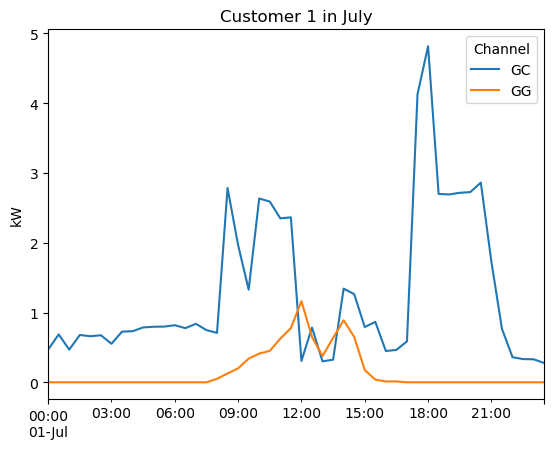

In [47]:
df[13]['2012-07-01':'2012-07-01'].plot()
plt.title('Customer 1 in July')
plt.ylabel('kW')
plt.savefig('Customer 1 2011-07 01-03.png', dpi=150);

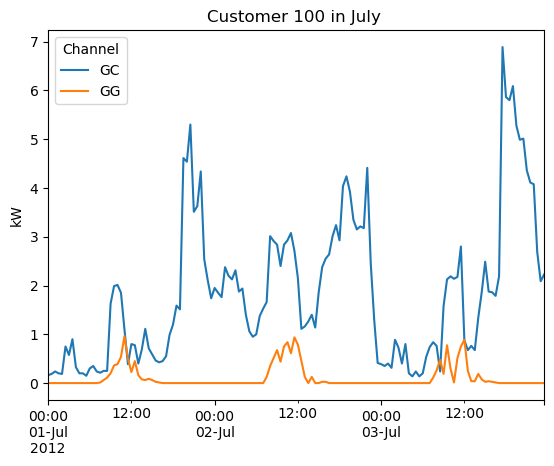

In [48]:
df[100]['2012-07-01':'2012-07-03'].plot()
plt.ylabel('kW')
plt.title('Customer 100 in July ');

### 3b) select *one* channel, across *all* customers

This is less easy because `channel` is the 2nd level of the MultiIndex.
It requires using [cross-section](http://pandas.pydata.org/pandas-docs/stable/advanced.html#cross-section) indexing with `xs`

In [49]:
dfGG = df.xs('GG', level='Channel', axis=1)
dfGG[[1, 4, 100]]

Customer,1,4,100
2012-07-01 00:00:00,0.0,0.0,0.0
2012-07-01 00:30:00,0.0,0.0,0.0
2012-07-01 01:00:00,0.0,0.0,0.0
2012-07-01 01:30:00,0.0,0.0,0.0
2012-07-01 02:00:00,0.0,0.0,0.0
...,...,...,...
2013-06-30 21:30:00,0.0,0.0,0.0
2013-06-30 22:00:00,0.0,0.0,0.0
2013-06-30 22:30:00,0.0,0.0,0.0
2013-06-30 23:00:00,0.0,0.0,0.0


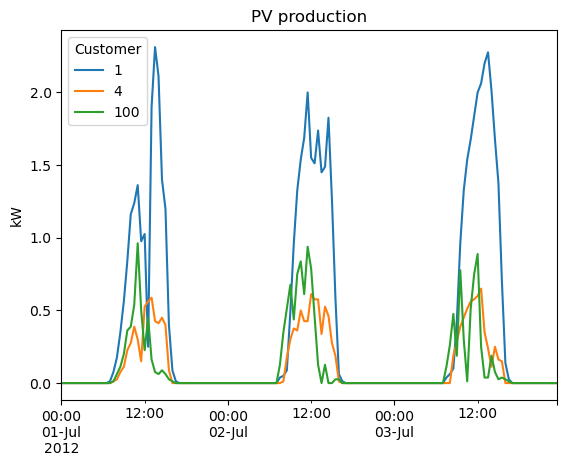

In [50]:
dfGG[[1, 4, 100]]['2012-07-01':'2012-07-03'].plot()
plt.title('PV production')
plt.ylabel('kW')
plt.savefig('PV production 2011-07 01-03.png', dpi=150);

## 4) Some stats

### 4a) PV generation capacity of each customer

observations:

* Generation capacity is constant over 2011-2012 (no generation upgrade)
* Mean at 1.68, *in agreement with data note* from Ausgrid (§ Summary statistics, p2)
* Most (75%) are between 1 and 2 kW.
* Some (2%) are around 6, 8 or 10 kW.

In [51]:
d_cust_cap = d_raw[['Customer', 'Generator Capacity']]
d_cust_cap.iloc[[0,1,2000, -1]]

,Customer,Generator Capacity
0,1,3.78
1,1,3.78
2000,3,1.00
268556,300,3.36


Check if the generator capacity is constant for each customer:

In [52]:
d_cust_cap.groupby('Customer')['Generator Capacity'].nunique().value_counts()

1    300
Name: Generator Capacity, dtype: int64

In [53]:
gen_cap = d_cust_cap.groupby('Customer')['Generator Capacity'].mean()
gen_cap.describe(percentiles=[0.5, 0.8, 0.9, 0.980])

count    300.000000
mean       1.683300
std        1.036846
min        1.000000
50%        1.500000
80%        2.040000
90%        2.728000
98%        4.571200
max        9.990000
Name: Generator Capacity, dtype: float64

[Text(0.5, 0, 'PV gen capacity (kW)')]

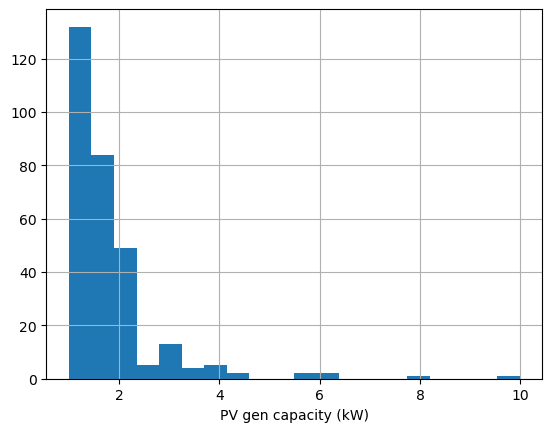

In [54]:
ax = gen_cap.hist(bins=20)
ax.set(xlabel='PV gen capacity (kW)')
#ax.set_yscale('log')

### 4b) Yield of PV generation 

* annual generation (kWh)
* sun hours/year (kWh/kWp)

#### Check of one customer

In [55]:
gen_cap[1]

3.7799999999999994

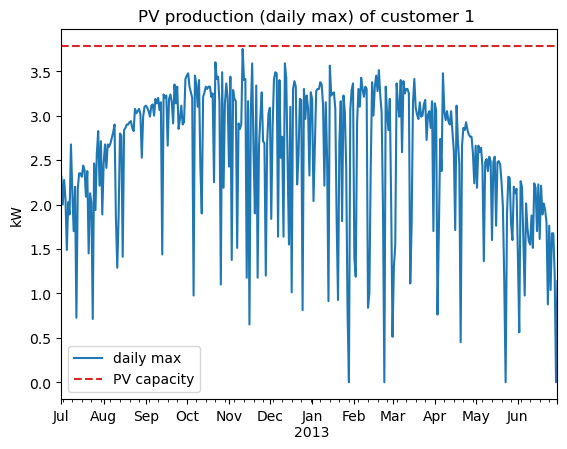

In [56]:
dfGG[1].resample('1D').max().plot(label='daily max')
plt.title('PV production (daily max) of customer 1 ')
plt.ylabel('kW')
plt.hlines(gen_cap[1], df.index[0], df.index[-1], linestyles='dashed', color='tab:red', label='PV capacity')
plt.legend();

#### Global statistics of PV generation

* Production mean and median *in agreement with data note* from Ausgrid (§ Summary statistics, p2)

* Normalized by capacity: **1231 hours/y** averaged across all customers
* All are above 800 hours/y, except 4 customers

NB: the coast around Sidney's has a GHI between 4-5 kWh/m²/day, that is **1500-1800 kWh/m²/y**

<img src='external/SolarGIS Australia GHI map south.png' alt='Australia GHI map' style='width:50em'>

In [57]:
dt = 0.5 # hours
GG_year = dfGG.sum()*dt
GG_year.mean(), GG_year.median()

(2182.567468227425, 1815.7019999999998)

In [58]:
pv_perf = GG_year/gen_cap
pv_perf.mean()

1297.38672223579

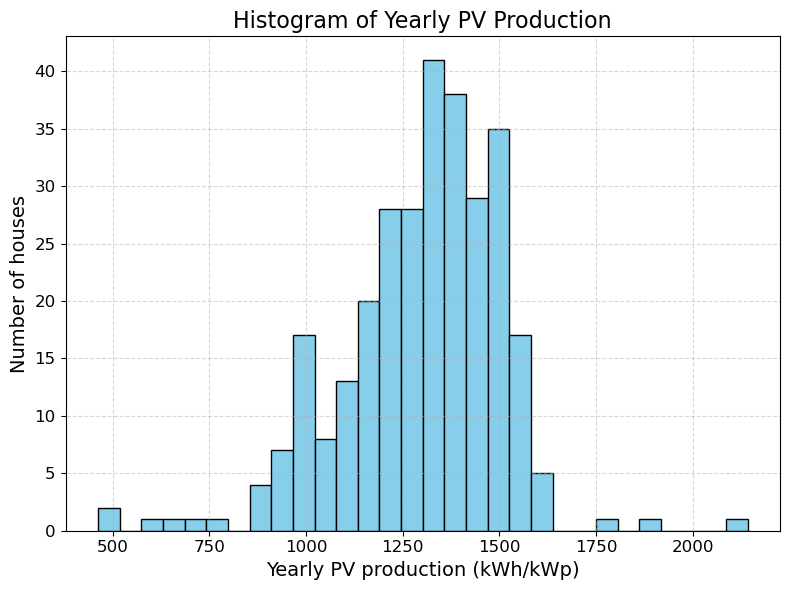

In [128]:
# pv_perf.hist(bins=30)
# plt.xlabel('yearly PV production kWh/kWp');
# Plot histogram
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
pv_perf.hist(bins=30, color='skyblue', edgecolor='black')  # Adjust colors
plt.xlabel('Yearly PV production (kWh/kWp)', fontsize=14)  # Set xlabel and fontsize
plt.ylabel('Number of houses', fontsize=14)  # Set ylabel and fontsize
plt.title('Histogram of Yearly PV Production', fontsize=16)  # Set title and fontsize
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines with transparency
plt.xticks(fontsize=12)  # Set xticks fontsize
plt.yticks(fontsize=12)  # Set yticks fontsize
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('pv_production_histogram.png', dpi=300)  # Save figure
plt.show()

#### PV installations with bad performance:

observation: bad performance relates to periods of blank production (maintenance issue or record issue ?).

In [60]:
cust_lowpv = pv_perf.index[pv_perf<700]
pv_perf[cust_lowpv].round()

Customer
6      579.0
92     462.0
116    476.0
266    670.0
dtype: float64

<Axes: >

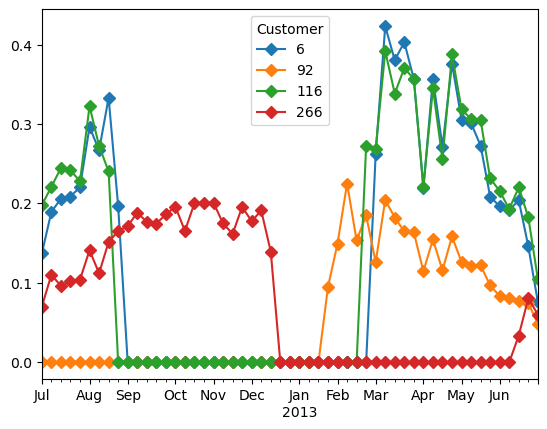

In [61]:
dfGG[cust_lowpv].resample('1W').mean().plot(style='-D')

### 4c) Consumption average

Notice: without caring for NaN values, the average consumption **doesn't match** the data note from Ausgrid (§ Summary statistics, p2).

In [90]:
dfGC = df.xs('GC', level='Channel', axis=1)
# dfCL = df.xs('CL', level='Channel', axis=1)


Customer,1,3,4,5,6,7,8,9,10,11,...,291,292,293,294,295,296,297,298,299,300
2012-07-01 00:00:00,1.710,1.930,0.168,0.216,0.520,0.174,0.416,0.050,0.040,1.134,...,0.442,0.150,0.366,0.268,0.150,0.060,0.282,0.314,1.082,0.438
2012-07-01 00:30:00,1.572,1.854,0.168,0.196,0.506,0.196,0.302,0.044,0.072,1.094,...,0.462,0.150,0.354,0.348,0.168,0.106,0.514,0.254,0.200,0.198
2012-07-01 01:00:00,1.208,2.718,0.164,0.210,0.360,0.128,0.184,0.022,0.018,1.226,...,0.494,0.126,0.386,0.330,0.108,0.088,0.394,0.244,0.180,0.268
2012-07-01 01:30:00,1.088,0.120,0.168,0.150,0.440,0.178,0.304,0.046,0.090,1.038,...,0.386,0.888,0.370,0.208,0.124,0.058,0.546,0.240,0.188,0.200
2012-07-01 02:00:00,1.194,0.118,0.172,0.204,0.342,0.134,0.166,0.048,0.198,0.628,...,0.282,0.162,0.352,0.260,0.148,0.088,0.412,0.212,0.092,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-06-30 21:30:00,0.548,0.112,0.268,0.780,2.126,0.168,0.406,0.144,0.184,1.494,...,0.716,0.226,0.870,2.798,0.652,0.240,0.334,0.534,1.236,1.162
2013-06-30 22:00:00,1.018,0.112,0.274,0.826,3.226,0.246,0.334,0.112,0.024,1.312,...,0.730,0.126,0.486,2.622,0.372,0.178,0.358,0.546,1.136,0.916
2013-06-30 22:30:00,0.332,0.130,0.280,2.136,2.088,0.150,0.228,0.148,0.082,0.582,...,1.144,0.062,0.404,2.666,1.880,0.130,0.362,0.494,1.664,0.944
2013-06-30 23:00:00,1.722,0.126,0.224,2.168,1.958,0.174,0.234,0.088,0.020,0.460,...,0.956,0.062,0.406,2.418,1.126,0.058,0.342,0.298,1.520,1.464


In [109]:
dt = 0.5 # hours
GC_year = (dfGC.sum()*dt)/366
# CL_year = dfCL.sum()*dt

GC_year.mean()

15.278197306138862

In [110]:
len(GC_year)

299

In [111]:
GC_year 

Customer
1      14.425913
3       5.323120
4       9.607503
5      10.916150
6      23.238489
         ...    
296     7.618566
297    11.810399
298     8.524145
299    28.062186
300    25.099448
Length: 299, dtype: float64

Proper treatment of NaNs:

In [119]:
Cons_y = pd.DataFrame({'GCy': GC_year})
Cons_y.sum(axis=1)
Cons_y.describe()

,GCy
count,299.000000
mean,15.278197
std,6.435718
min,4.501208
25%,10.423057
50%,13.858776
75%,19.215825
max,37.932986


In [113]:
Cons_y.sum(axis=1).mean()

15.278197306138862

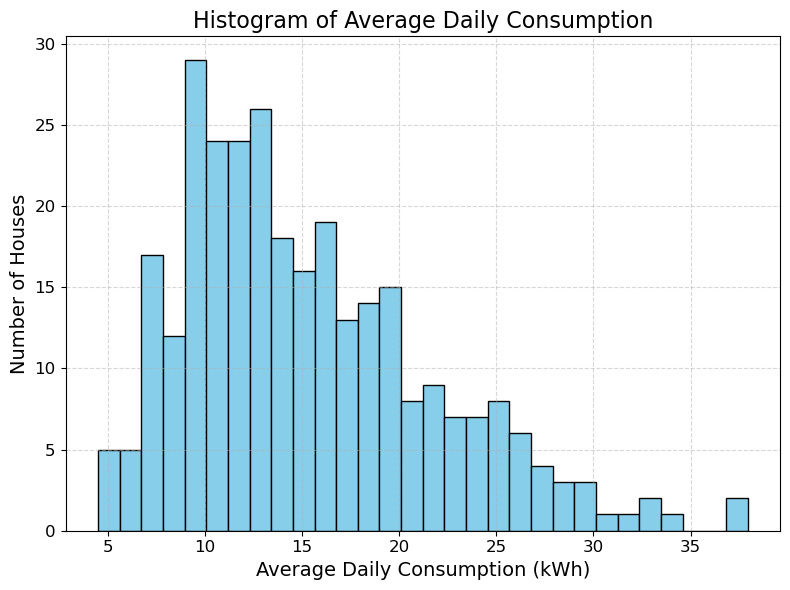

In [127]:
# Cons_y.sum(axis=1).hist(bins=30)
# Assuming Cons_y is your data
Cons_y_sum = Cons_y.sum(axis=1)

# Create a histogram
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
Cons_y.sum(axis=1).hist(bins=30, color='skyblue', edgecolor='black')  # Adjust colors
plt.xlabel('Average Daily Consumption (kWh)', fontsize=14)  # Set xlabel and fontsize
plt.ylabel('Number of Houses', fontsize=14)  # Set ylabel and fontsize
plt.title('Histogram of Average Daily Consumption', fontsize=16)  # Set title and fontsize
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines with transparency
plt.xticks(fontsize=12)  # Set xticks fontsize
plt.yticks(fontsize=12)  # Set yticks fontsize
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('Average_daily_consumption.png', dpi=300)  # Save figure
plt.show()

#### Max consumption:

In [121]:
Cons = dfGC.add(dfGC, fill_value=0) 
Cons.max().describe()

count    299.000000
mean      12.688977
std        4.186648
min        4.664000
25%        9.458000
50%       12.188000
75%       15.544000
max       26.268000
dtype: float64

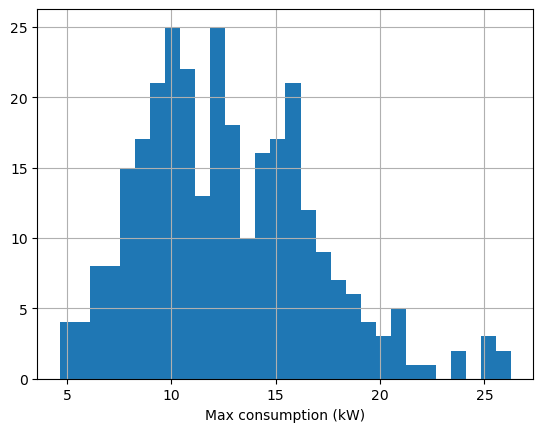

In [70]:
Cons.max().hist(bins=30)
plt.xlabel('Max consumption (kW)');

#### Full load equivalent time

T = E_year/P_max

In [71]:
Cons_hours = Cons_y.sum(axis=1)/Cons.max()
Cons_hours.describe()

count    299.000000
mean     450.243677
std      145.928244
min      147.198372
25%      345.166833
50%      429.524213
75%      541.247310
max      958.651488
dtype: float64

<Axes: >

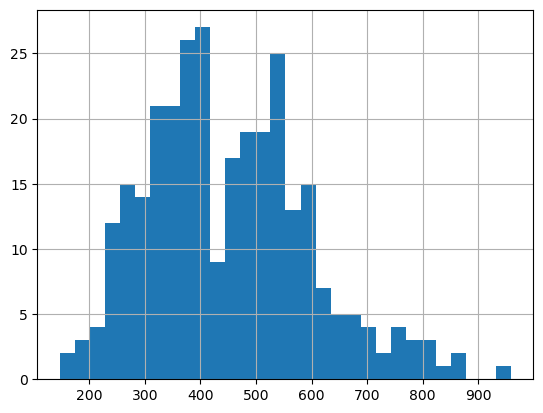

In [72]:
Cons_hours.hist(bins=30)

### 4d) Consumption/Production relationship

observations: there a small positive effect of the consumpation on the PV sizing. However the effect varies with quantiles (cf. Statsmodel [quantile regression example](http://www.statsmodels.org/devel/examples/notebooks/generated/quantile_regression.html)). There is a spreading effect.

* high quantiles: big PV production comes with bit consumers
* low quantiles: small PV production is almost independent of consumption

#### Average data

TODO: add controlled consumption to GC

In [73]:
import statsmodels.formula.api as smf

In [74]:
d = pd.DataFrame({
    'GC_ym': dfGC.mean(), 
    'GG_ym': dfGG.mean()})
mod = smf.quantreg('GG_ym ~ GC_ym', d)
res = mod.fit(q=0.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                  GG_ym   Pseudo R-squared:              0.02521
Model:                       QuantReg   Bandwidth:                     0.06611
Method:                 Least Squares   Sparsity:                       0.2238
Date:                Wed, 28 Feb 2024   No. Observations:                  299
Time:                        21:09:41   Df Residuals:                      297
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1497      0.017      8.972      0.000       0.117       0.183
GC_ym          0.0959      0.024      3.979      0.000       0.048       0.143
==============================================================================
"""

In [75]:
par = res.params
par

Intercept    0.149748
GC_ym        0.095897
dtype: float64

In [76]:
x = np.linspace(0.1, 1.7)
y = par.Intercept + x*par.GC_ym

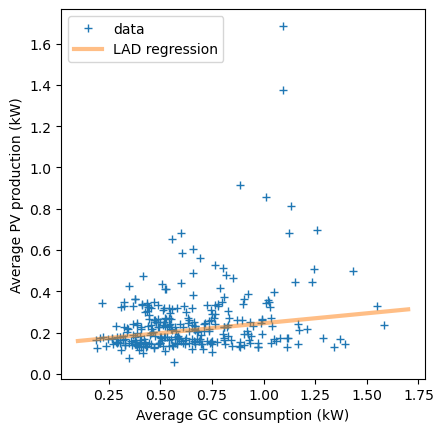

In [77]:
plt.plot(dfGC.mean(), dfGG.mean(), '+', label='data')
plt.plot(x, y, '-', lw=3, alpha=0.5, label='LAD regression')
ax = plt.gca()
plt.legend()
ax.set(
    xlabel='Average GC consumption (kW)',
    ylabel='Average PV production (kW)',
    aspect='equal'
);

#### Max data (i.e. system sizing)

In [78]:
d = pd.DataFrame({
    'GC_max': dfGC.max(), 
    'GG_max': dfGG.max()})
mod = smf.quantreg('GG_max ~ GC_max', d)
res = mod.fit(q=0.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                 GG_max   Pseudo R-squared:             0.006807
Model:                       QuantReg   Bandwidth:                      0.4335
Method:                 Least Squares   Sparsity:                        1.492
Date:                Wed, 28 Feb 2024   No. Observations:                  299
Time:                        21:09:41   Df Residuals:                      297
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1835      0.138      8.580      0.000       0.912       1.455
GC_max         0.0224      0.021      1.086      0.278      -0.018       0.063
==============================================================================
"""

In [79]:
par = res.params
par

Intercept    1.183493
GC_max       0.022420
dtype: float64

In [80]:
x = np.linspace(2, 15)
y = par.Intercept + x*par.GC_max

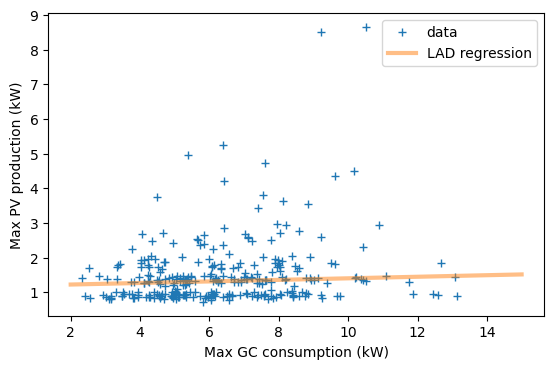

In [81]:
plt.plot(dfGC.max(), dfGG.max(), '+', label='data')
plt.plot(x, y, '-', lw=3, alpha=0.5, label='LAD regression')
ax = plt.gca()
plt.legend()
ax.set(
    xlabel='Max GC consumption (kW)',
    ylabel='Max PV production (kW)',
    aspect='equal'
);

### 4e) Correlation across PV productions

In [82]:
pv_corr = dfGG.corr()

In [83]:
pv_corr.iloc[0:5,0:5]

Customer,1,3,4,5,6
Customer,,,,,
1,1.000000,0.873379,0.935896,0.900165,0.404192
3,0.873379,1.000000,0.855701,0.948452,0.472031
4,0.935896,0.855701,1.000000,0.890842,0.462000
5,0.900165,0.948452,0.890842,1.000000,0.496465
6,0.404192,0.472031,0.462000,0.496465,1.000000


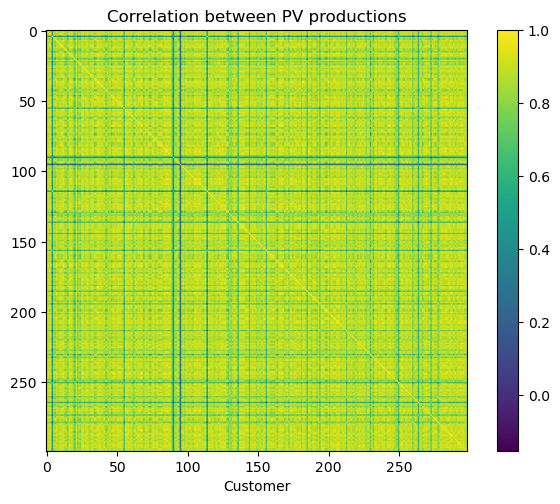

In [84]:
plt.imshow(pv_corr)
plt.colorbar()
plt.tight_layout()
plt.xlabel('Customer')
plt.title('Correlation between PV productions');

#### Effect of the distance on the correlation

distance estimated with geocoding

In [85]:
from itertools import combinations # Combinatoric generator

In [86]:
df_pcodes = pd.read_csv('postcodes.csv', comment='#', index_col='postcode')
df_pcodes

,lat,lng,dlat_km,dlng_km,area_km2
postcode,,,,,
2008,-33.887887,151.196403,1.178955,1.766613,2.082757
2010,-33.882559,151.213158,2.039637,2.559093,5.219621
2018,-33.921990,151.207330,3.230835,2.408996,7.783069
2021,-33.892120,151.230645,3.256143,2.567510,8.360180
2025,-33.886500,151.243761,1.142317,2.256786,2.577965
...,...,...,...,...,...
2321,-32.691654,151.443547,40.502852,45.987693,1862.632734
2324,-32.640042,151.911142,30.439834,59.878643,1822.695927
2325,-32.938053,151.186933,42.827082,59.754323,2559.103278


Postcode of customers:

* some post codes have many customers (2259, 2261: Central Coast area, 2290: New Castle)
* many only one or two customer per postcode

In [87]:
cust_code = d_raw.groupby('Customer')['Postcode'].min()
cust_code.value_counts()

2259    28
2261    21
2290    13
2093     9
2262     8
        ..
2046     1
2010     1
2324     1
2196     1
2216     1
Name: Postcode, Length: 100, dtype: int64

<Axes: >

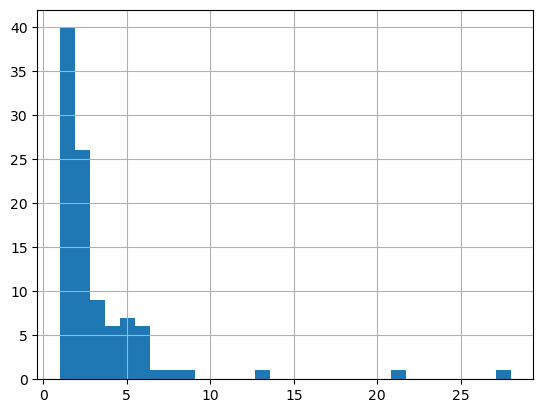

In [88]:
cust_code.value_counts().hist(bins=30)

Helper: compute distance between two places given as (lat, long)

use formula "haversine formula" from [Great-circle_distance](https://en.wikipedia.org/wiki/Great-circle_distance#Computational_formulas).

In [89]:
def great_circle(latlong1, latlong2):
    '''great circle distance between two points on a spherical earth
    
    longitudes and latitudes in degrees. Distance in km.
    '''
    R = 6371 # km
    d2r = np.deg2rad
    from numpy import cos, sin, arcsin, sqrt
    
    lat1, lng1 = latlong1
    lat2, lng2 = latlong2
    dlat = d2r(lat2 - lat1)
    dlng = d2r(lng2 - lng1)
    
    cos12 = cos(d2r(lat1))*cos(d2r(lat2))
                       
    a = sin(dlat/2)**2 + cos12*np.sin(dlng/2)**2
    ang = 2*arcsin(sqrt(a))
    return R*ang

cities = {
    'Newcastle': (-32.933, 151.733),
    'Cessnock': (-32.834, 151.3555),
    'Gosford': (-33.433, 151.33),
    'Sydney':  (-33.856, 151.1925),
    'Paris': (48.8571, 2.35191),
    'Rennes': (48.11449, -1.67902)
}
#great_circle(cities['Rennes'], cities['Paris']) # check 309 km
great_circle(cities['Newcastle'], cities['Sydney']), great_circle(cities['Newcastle'], cities['Cessnock'])

(114.24202913650407, 36.92938804535449)